In [39]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, log_loss
from xgboost import XGBClassifier
from sklearn import svm
from lightgbm import LGBMClassifier
import lightgbm as lgb

df = pd.read_csv('../data/train_data.csv')
test = pd.read_csv('../data/test_data.csv')


In [45]:
def split_data(X, y, frac: float = 0.2) -> tuple:
    """Splits data so that it returns a train / test split with a given fraction"""

    # cutoff point for training / test split
    idx_cutoff = int(X.shape[0] * (1 - frac))

    X_train, X_test, y_train, y_test = X.iloc[:idx_cutoff], X.iloc[idx_cutoff:], y.iloc[:idx_cutoff], y.iloc[idx_cutoff:]

    return X_train, X_test, y_train, y_test

In [46]:
col_list_train = list(df.columns)
col_list_train.remove('Diabetes')


dfX_train = df[col_list_train]
dfy_train = df['Diabetes']

X_train, X_test, y_train, y_test = split_data(dfX_train, dfy_train, 0.2)

In [47]:
mod_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components= 0.9)), ('logisticRegression', LogisticRegression())])
mod_pipeline.fit(X_train, y_train)
test_score = mod_pipeline.score(X_test, y_test)
test_score

0.7224115496623087

In [67]:
prediction = mod_pipeline.predict_proba(X_test)
log_loss(y_true = y_test, y_pred = prediction)


0.5639282062803498

In [49]:
sup_vec_mac = svm.SVC(kernel = 'linear', C = 1)
sup_vec_mac.fit(X_train, y_train)
prediction = sup_vec_mac.predict(X_test)
# log_loss(y_true = y_test, y_pred = prediction)


In [50]:
log_loss(y_true = y_test, y_pred = prediction)


9.221644068454006

In [51]:
model = XGBClassifier(verbosity = 2, objective = 'binary:logistic')
model.fit(X_train, y_train, eval_metric = "logloss")
prediction = sup_vec_mac.predict(X_test)
log_loss(y_true = y_test, y_pred = prediction)

c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[09:11:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[09:11:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[09:11:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[09:11:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[09:11:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c

9.221644068454006

In [52]:
def split_data(X, y, frac: float = 0.2) -> tuple:
    """Splits data so that it returns a train / test split with a given fraction"""

    # cutoff point for training / test split
    idx_cutoff = int(X.shape[0] * (1 - frac))

    X_train, X_test, y_train, y_test = X.iloc[:idx_cutoff], X.iloc[idx_cutoff:], y.iloc[:idx_cutoff], y.iloc[idx_cutoff:]

    return X_train, X_test, y_train, y_test

In [53]:
col_list_train = list(df.columns)
col_list_train.remove('Diabetes')


dfX_train = df[col_list_train]
dfy_train = df['Diabetes']

X_train, X_test, y_train, y_test = split_data(dfX_train, dfy_train, 0.2)

# col_list_test = list(test.columns)
# col_list_test.remove('Diabetes')



# X_test = test[col_list_test]
# y_test = test['Diabetes']

c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.512471	valid_0's binary_logloss: 0.567238
[40]	training's binary_logloss: 0.495656	valid_0's binary_logloss: 0.559822
[60]	training's binary_logloss: 0.490399	valid_0's binary_logloss: 0.560458
[80]	training's binary_logloss: 0.486978	valid_0's binary_logloss: 0.56133
[100]	training's binary_logloss: 0.483974	valid_0's binary_logloss: 0.562379
0.5623785025270797
Training accuracy 0.7586
Testing accuracy 0.7424


array([[0.56979908, 0.43020092],
       [0.28909296, 0.71090704],
       [0.12254752, 0.87745248],
       ...,
       [0.92873409, 0.07126591],
       [0.90454723, 0.09545277],
       [0.72134881, 0.27865119]])

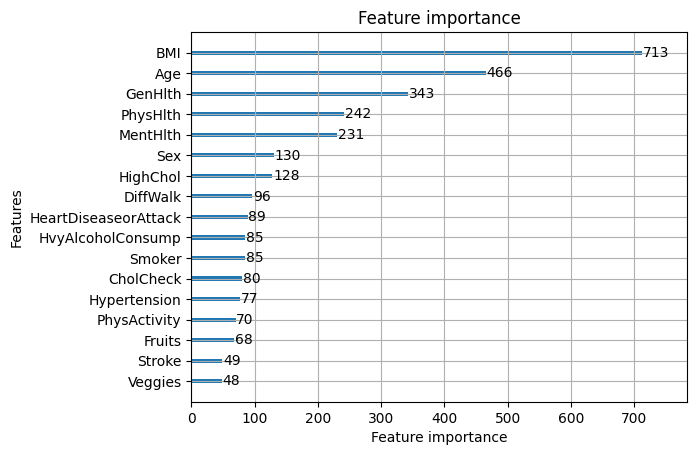

In [86]:
lgbm = LGBMClassifier(objective = "binary", max_depth = -5)
lgbm.fit(X_train,y_train, eval_set = [(X_test, y_test) , (X_train, y_train)], eval_metric = 'logloss', verbose = 20)
prediction = lgbm.predict_proba(X_test)
print(log_loss(y_true = y_test, y_pred = prediction))
lgb.plot_importance(lgbm)
print('Training accuracy {:.4f}'.format(lgbm.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(lgbm.score(X_test,y_test)))
prediction

<AxesSubplot: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

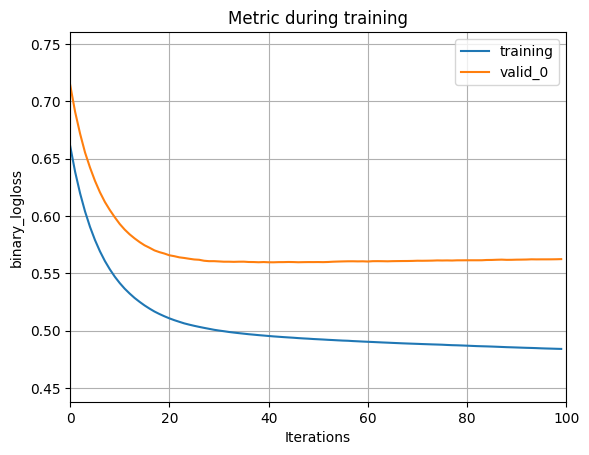

In [55]:
lgb.plot_metric(lgbm)


In [59]:
col_list_train = list(df.columns)
col_list_train.remove('Diabetes')
# col_list_train.remove('Veggies')



dfX_train = df[col_list_train]
dfy_train = df['Diabetes']

X_train, X_test, y_train, y_test = split_data(dfX_train, dfy_train, 0.2)

c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.512471	valid_0's binary_logloss: 0.567238
[40]	training's binary_logloss: 0.495656	valid_0's binary_logloss: 0.559822
[60]	training's binary_logloss: 0.490399	valid_0's binary_logloss: 0.560458
[80]	training's binary_logloss: 0.486978	valid_0's binary_logloss: 0.56133
[100]	training's binary_logloss: 0.483974	valid_0's binary_logloss: 0.562379
0.5623785025270797
Training accuracy 0.7586
Testing accuracy 0.7424


array([[0.56979908, 0.43020092],
       [0.28909296, 0.71090704],
       [0.12254752, 0.87745248],
       ...,
       [0.92873409, 0.07126591],
       [0.90454723, 0.09545277],
       [0.72134881, 0.27865119]])

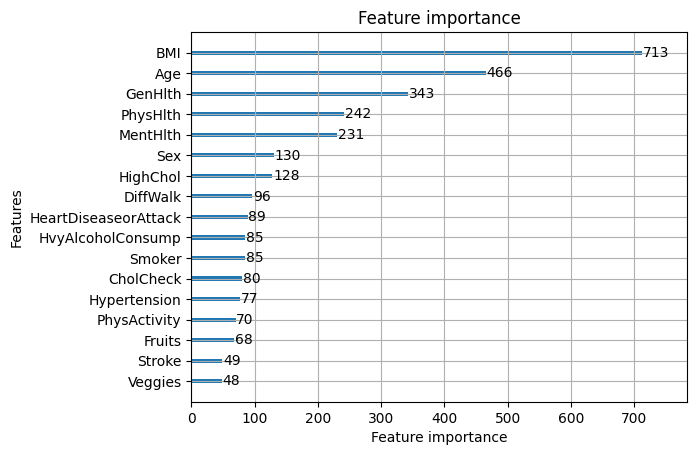

In [87]:
stdScale = StandardScaler()
stdScale.fit_transform(X_train)
stdScale.transform(X_test)


lgbm = LGBMClassifier(objective = "binary", max_depth = 30)
lgbm.fit(X_train,y_train, eval_set = [(X_test, y_test) , (X_train, y_train)], eval_metric = 'logloss', verbose = 20)
prediction = lgbm.predict_proba(X_test)
print(log_loss(y_true = y_test, y_pred = prediction))
lgb.plot_importance(lgbm)
print('Training accuracy {:.4f}'.format(lgbm.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(lgbm.score(X_test,y_test)))
prediction

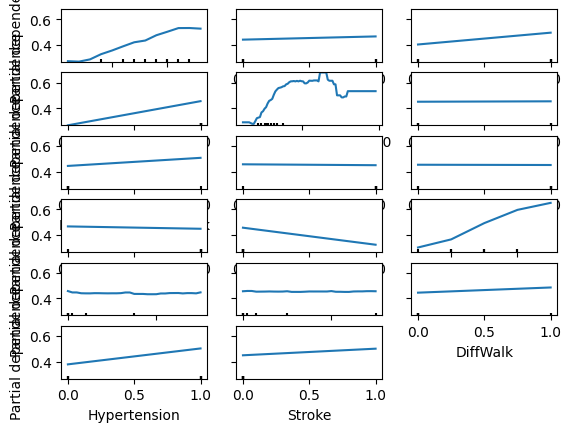

In [72]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
results = partial_dependence(lgbm, X_train, ['BMI'] )
PartialDependenceDisplay.from_estimator(lgbm, X_train, col_list_train, kind = 'average')

In [73]:
col_list_train

['Age',
 'Sex',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Hypertension',
 'Stroke']

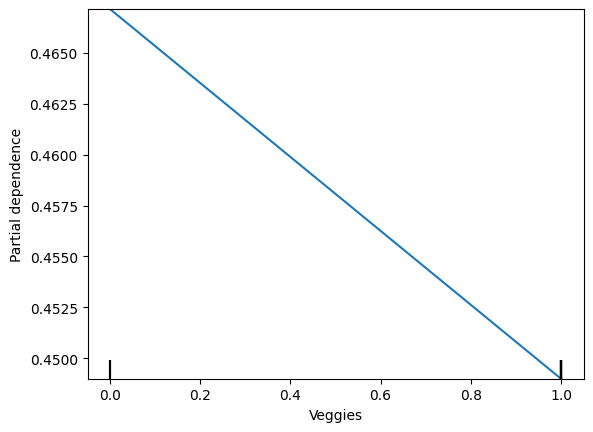

In [78]:
PartialDependenceDisplay.from_estimator(lgbm, X_train, ['Veggies'], kind = 'average')

In [83]:
stdScale = StandardScaler()
stdScale.fit_transform(X_train)
stdScale.transform(X_test)

output = {}

lr = 0.001
while lr < 0.1:
    lgbm = LGBMClassifier(objective = "binary", max_depth = 30, learning_rate = lr)
    lgbm.fit(X_train,y_train, eval_set = [(X_test, y_test) , (X_train, y_train)], eval_metric = 'logloss', verbose = 20)
    prediction = lgbm.predict_proba(X_test)
    # output.append(log_loss(y_true = y_test, y_pred = prediction))
    output[lr] = log_loss(y_true = y_test, y_pred = prediction)
    lr += .001




c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.682952	valid_0's binary_logloss: 0.737028
[40]	training's binary_logloss: 0.677502	valid_0's binary_logloss: 0.731423
[60]	training's binary_logloss: 0.672249	valid_0's binary_logloss: 0.726001
[80]	training's binary_logloss: 0.667185	valid_0's binary_logloss: 0.720778
[100]	training's binary_logloss: 0.662306	valid_0's binary_logloss: 0.715755


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.677497	valid_0's binary_logloss: 0.731417
[40]	training's binary_logloss: 0.667176	valid_0's binary_logloss: 0.720768
[60]	training's binary_logloss: 0.65759	valid_0's binary_logloss: 0.710907
[80]	training's binary_logloss: 0.648677	valid_0's binary_logloss: 0.701751
[100]	training's binary_logloss: 0.640377	valid_0's binary_logloss: 0.693252


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.672235	valid_0's binary_logloss: 0.725981
[40]	training's binary_logloss: 0.657577	valid_0's binary_logloss: 0.710887
[60]	training's binary_logloss: 0.644437	valid_0's binary_logloss: 0.697397
[80]	training's binary_logloss: 0.632618	valid_0's binary_logloss: 0.685337
[100]	training's binary_logloss: 0.621935	valid_0's binary_logloss: 0.674457


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.667159	valid_0's binary_logloss: 0.72074
[40]	training's binary_logloss: 0.648645	valid_0's binary_logloss: 0.701696
[60]	training's binary_logloss: 0.632594	valid_0's binary_logloss: 0.685306
[80]	training's binary_logloss: 0.618579	valid_0's binary_logloss: 0.671031
[100]	training's binary_logloss: 0.606287	valid_0's binary_logloss: 0.658533


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.66226	valid_0's binary_logloss: 0.715704
[40]	training's binary_logloss: 0.640321	valid_0's binary_logloss: 0.693167
[60]	training's binary_logloss: 0.621893	valid_0's binary_logloss: 0.67439
[80]	training's binary_logloss: 0.606257	valid_0's binary_logloss: 0.658513
[100]	training's binary_logloss: 0.592868	valid_0's binary_logloss: 0.644985


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.657541	valid_0's binary_logloss: 0.710846
[40]	training's binary_logloss: 0.632559	valid_0's binary_logloss: 0.685283
[60]	training's binary_logloss: 0.612192	valid_0's binary_logloss: 0.66453
[80]	training's binary_logloss: 0.595356	valid_0's binary_logloss: 0.647507
[100]	training's binary_logloss: 0.581371	valid_0's binary_logloss: 0.633514


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.652981	valid_0's binary_logloss: 0.706145
[40]	training's binary_logloss: 0.625288	valid_0's binary_logloss: 0.677875
[60]	training's binary_logloss: 0.603373	valid_0's binary_logloss: 0.655633
[80]	training's binary_logloss: 0.585731	valid_0's binary_logloss: 0.637836
[100]	training's binary_logloss: 0.57147	valid_0's binary_logloss: 0.62366


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.648585	valid_0's binary_logloss: 0.701632
[40]	training's binary_logloss: 0.618496	valid_0's binary_logloss: 0.670928
[60]	training's binary_logloss: 0.595303	valid_0's binary_logloss: 0.647424
[80]	training's binary_logloss: 0.577203	valid_0's binary_logloss: 0.629303
[100]	training's binary_logloss: 0.5629	valid_0's binary_logloss: 0.61502


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.644336	valid_0's binary_logloss: 0.697277
[40]	training's binary_logloss: 0.612136	valid_0's binary_logloss: 0.664438
[60]	training's binary_logloss: 0.587976	valid_0's binary_logloss: 0.640025
[80]	training's binary_logloss: 0.569615	valid_0's binary_logloss: 0.621743
[100]	training's binary_logloss: 0.555462	valid_0's binary_logloss: 0.607607


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.640234	valid_0's binary_logloss: 0.693089
[40]	training's binary_logloss: 0.606152	valid_0's binary_logloss: 0.658398
[60]	training's binary_logloss: 0.581277	valid_0's binary_logloss: 0.633431
[80]	training's binary_logloss: 0.562849	valid_0's binary_logloss: 0.614998
[100]	training's binary_logloss: 0.548912	valid_0's binary_logloss: 0.600885


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.636268	valid_0's binary_logloss: 0.689018
[40]	training's binary_logloss: 0.600515	valid_0's binary_logloss: 0.652675
[60]	training's binary_logloss: 0.575161	valid_0's binary_logloss: 0.627381
[80]	training's binary_logloss: 0.556829	valid_0's binary_logloss: 0.609027
[100]	training's binary_logloss: 0.5432	valid_0's binary_logloss: 0.595221


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.632437	valid_0's binary_logloss: 0.685141
[40]	training's binary_logloss: 0.59519	valid_0's binary_logloss: 0.647325
[60]	training's binary_logloss: 0.569547	valid_0's binary_logloss: 0.621691
[80]	training's binary_logloss: 0.551382	valid_0's binary_logloss: 0.603386
[100]	training's binary_logloss: 0.538209	valid_0's binary_logloss: 0.590365


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.628735	valid_0's binary_logloss: 0.681358
[40]	training's binary_logloss: 0.590224	valid_0's binary_logloss: 0.642321
[60]	training's binary_logloss: 0.564393	valid_0's binary_logloss: 0.616429
[80]	training's binary_logloss: 0.546497	valid_0's binary_logloss: 0.598428
[100]	training's binary_logloss: 0.533784	valid_0's binary_logloss: 0.586134


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.625143	valid_0's binary_logloss: 0.677689
[40]	training's binary_logloss: 0.585574	valid_0's binary_logloss: 0.637556
[60]	training's binary_logloss: 0.559667	valid_0's binary_logloss: 0.611814
[80]	training's binary_logloss: 0.542075	valid_0's binary_logloss: 0.594134
[100]	training's binary_logloss: 0.52985	valid_0's binary_logloss: 0.582507


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.621682	valid_0's binary_logloss: 0.674163
[40]	training's binary_logloss: 0.581156	valid_0's binary_logloss: 0.633199
[60]	training's binary_logloss: 0.555337	valid_0's binary_logloss: 0.607442
[80]	training's binary_logloss: 0.538153	valid_0's binary_logloss: 0.590211
[100]	training's binary_logloss: 0.526372	valid_0's binary_logloss: 0.579197


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.618314	valid_0's binary_logloss: 0.670746
[40]	training's binary_logloss: 0.57703	valid_0's binary_logloss: 0.628975
[60]	training's binary_logloss: 0.551324	valid_0's binary_logloss: 0.603312
[80]	training's binary_logloss: 0.534597	valid_0's binary_logloss: 0.586887
[100]	training's binary_logloss: 0.52314	valid_0's binary_logloss: 0.576419


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.615062	valid_0's binary_logloss: 0.667373
[40]	training's binary_logloss: 0.573081	valid_0's binary_logloss: 0.625176
[60]	training's binary_logloss: 0.547575	valid_0's binary_logloss: 0.599485
[80]	training's binary_logloss: 0.531307	valid_0's binary_logloss: 0.583848
[100]	training's binary_logloss: 0.520293	valid_0's binary_logloss: 0.573884


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.611922	valid_0's binary_logloss: 0.664231
[40]	training's binary_logloss: 0.569404	valid_0's binary_logloss: 0.621481
[60]	training's binary_logloss: 0.54415	valid_0's binary_logloss: 0.596142
[80]	training's binary_logloss: 0.528377	valid_0's binary_logloss: 0.580994
[100]	training's binary_logloss: 0.517706	valid_0's binary_logloss: 0.571666


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.608879	valid_0's binary_logloss: 0.661018
[40]	training's binary_logloss: 0.565897	valid_0's binary_logloss: 0.617967
[60]	training's binary_logloss: 0.540983	valid_0's binary_logloss: 0.593015
[80]	training's binary_logloss: 0.52563	valid_0's binary_logloss: 0.578534
[100]	training's binary_logloss: 0.51537	valid_0's binary_logloss: 0.56983


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.605908	valid_0's binary_logloss: 0.658095
[40]	training's binary_logloss: 0.562611	valid_0's binary_logloss: 0.614798
[60]	training's binary_logloss: 0.538051	valid_0's binary_logloss: 0.590078
[80]	training's binary_logloss: 0.523088	valid_0's binary_logloss: 0.576359
[100]	training's binary_logloss: 0.513334	valid_0's binary_logloss: 0.568188


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.603034	valid_0's binary_logloss: 0.65512
[40]	training's binary_logloss: 0.559503	valid_0's binary_logloss: 0.611666
[60]	training's binary_logloss: 0.535375	valid_0's binary_logloss: 0.587626
[80]	training's binary_logloss: 0.520773	valid_0's binary_logloss: 0.574377
[100]	training's binary_logloss: 0.511472	valid_0's binary_logloss: 0.56679


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.600242	valid_0's binary_logloss: 0.652336
[40]	training's binary_logloss: 0.556569	valid_0's binary_logloss: 0.608594
[60]	training's binary_logloss: 0.532822	valid_0's binary_logloss: 0.58518
[80]	training's binary_logloss: 0.518691	valid_0's binary_logloss: 0.572503
[100]	training's binary_logloss: 0.509823	valid_0's binary_logloss: 0.565583


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.59753	valid_0's binary_logloss: 0.649621
[40]	training's binary_logloss: 0.553772	valid_0's binary_logloss: 0.605819
[60]	training's binary_logloss: 0.530448	valid_0's binary_logloss: 0.582941
[80]	training's binary_logloss: 0.516684	valid_0's binary_logloss: 0.570924
[100]	training's binary_logloss: 0.508296	valid_0's binary_logloss: 0.564833


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.594927	valid_0's binary_logloss: 0.647006
[40]	training's binary_logloss: 0.551159	valid_0's binary_logloss: 0.603089
[60]	training's binary_logloss: 0.528361	valid_0's binary_logloss: 0.581067
[80]	training's binary_logloss: 0.514918	valid_0's binary_logloss: 0.569482
[100]	training's binary_logloss: 0.506952	valid_0's binary_logloss: 0.563829


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.592402	valid_0's binary_logloss: 0.644406
[40]	training's binary_logloss: 0.548597	valid_0's binary_logloss: 0.600394
[60]	training's binary_logloss: 0.526254	valid_0's binary_logloss: 0.579153
[80]	training's binary_logloss: 0.513258	valid_0's binary_logloss: 0.568151
[100]	training's binary_logloss: 0.505736	valid_0's binary_logloss: 0.563153


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.589907	valid_0's binary_logloss: 0.641819
[40]	training's binary_logloss: 0.546239	valid_0's binary_logloss: 0.598107
[60]	training's binary_logloss: 0.524244	valid_0's binary_logloss: 0.577314
[80]	training's binary_logloss: 0.511778	valid_0's binary_logloss: 0.566961
[100]	training's binary_logloss: 0.504644	valid_0's binary_logloss: 0.562444


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.587529	valid_0's binary_logloss: 0.639522
[40]	training's binary_logloss: 0.543936	valid_0's binary_logloss: 0.595944
[60]	training's binary_logloss: 0.522366	valid_0's binary_logloss: 0.575744
[80]	training's binary_logloss: 0.510383	valid_0's binary_logloss: 0.566086
[100]	training's binary_logloss: 0.503631	valid_0's binary_logloss: 0.562072


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.585185	valid_0's binary_logloss: 0.637318
[40]	training's binary_logloss: 0.541848	valid_0's binary_logloss: 0.593839
[60]	training's binary_logloss: 0.520671	valid_0's binary_logloss: 0.574222
[80]	training's binary_logloss: 0.509163	valid_0's binary_logloss: 0.56511
[100]	training's binary_logloss: 0.502713	valid_0's binary_logloss: 0.561555


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.582954	valid_0's binary_logloss: 0.634957
[40]	training's binary_logloss: 0.539785	valid_0's binary_logloss: 0.591803
[60]	training's binary_logloss: 0.519077	valid_0's binary_logloss: 0.572737
[80]	training's binary_logloss: 0.507944	valid_0's binary_logloss: 0.564448
[100]	training's binary_logloss: 0.501831	valid_0's binary_logloss: 0.56125


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.580784	valid_0's binary_logloss: 0.63292
[40]	training's binary_logloss: 0.537903	valid_0's binary_logloss: 0.589774
[60]	training's binary_logloss: 0.517566	valid_0's binary_logloss: 0.571376
[80]	training's binary_logloss: 0.506926	valid_0's binary_logloss: 0.563538
[100]	training's binary_logloss: 0.501007	valid_0's binary_logloss: 0.560941


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.578623	valid_0's binary_logloss: 0.630606
[40]	training's binary_logloss: 0.536079	valid_0's binary_logloss: 0.588091
[60]	training's binary_logloss: 0.516071	valid_0's binary_logloss: 0.570197
[80]	training's binary_logloss: 0.505899	valid_0's binary_logloss: 0.563248
[100]	training's binary_logloss: 0.500286	valid_0's binary_logloss: 0.560647


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.57661	valid_0's binary_logloss: 0.628719
[40]	training's binary_logloss: 0.534237	valid_0's binary_logloss: 0.586492
[60]	training's binary_logloss: 0.514816	valid_0's binary_logloss: 0.569395
[80]	training's binary_logloss: 0.505024	valid_0's binary_logloss: 0.563015
[100]	training's binary_logloss: 0.499661	valid_0's binary_logloss: 0.560449


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.574629	valid_0's binary_logloss: 0.626638
[40]	training's binary_logloss: 0.532641	valid_0's binary_logloss: 0.584897
[60]	training's binary_logloss: 0.513577	valid_0's binary_logloss: 0.5681
[80]	training's binary_logloss: 0.504173	valid_0's binary_logloss: 0.562277
[100]	training's binary_logloss: 0.499051	valid_0's binary_logloss: 0.560231


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.572638	valid_0's binary_logloss: 0.624629
[40]	training's binary_logloss: 0.531032	valid_0's binary_logloss: 0.583516
[60]	training's binary_logloss: 0.51238	valid_0's binary_logloss: 0.567397
[80]	training's binary_logloss: 0.503381	valid_0's binary_logloss: 0.562027
[100]	training's binary_logloss: 0.498449	valid_0's binary_logloss: 0.560084


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.57083	valid_0's binary_logloss: 0.622872
[40]	training's binary_logloss: 0.529592	valid_0's binary_logloss: 0.581929
[60]	training's binary_logloss: 0.511372	valid_0's binary_logloss: 0.566429
[80]	training's binary_logloss: 0.50266	valid_0's binary_logloss: 0.561605
[100]	training's binary_logloss: 0.497928	valid_0's binary_logloss: 0.559787


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.56902	valid_0's binary_logloss: 0.62087
[40]	training's binary_logloss: 0.528114	valid_0's binary_logloss: 0.580858
[60]	training's binary_logloss: 0.510312	valid_0's binary_logloss: 0.565927
[80]	training's binary_logloss: 0.501963	valid_0's binary_logloss: 0.561286
[100]	training's binary_logloss: 0.497444	valid_0's binary_logloss: 0.559934


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.567202	valid_0's binary_logloss: 0.619168
[40]	training's binary_logloss: 0.526736	valid_0's binary_logloss: 0.57952
[60]	training's binary_logloss: 0.509375	valid_0's binary_logloss: 0.565321
[80]	training's binary_logloss: 0.5013	valid_0's binary_logloss: 0.561318
[100]	training's binary_logloss: 0.496991	valid_0's binary_logloss: 0.559884


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.56547	valid_0's binary_logloss: 0.61744
[40]	training's binary_logloss: 0.525343	valid_0's binary_logloss: 0.578098
[60]	training's binary_logloss: 0.508437	valid_0's binary_logloss: 0.564572
[80]	training's binary_logloss: 0.500711	valid_0's binary_logloss: 0.560673
[100]	training's binary_logloss: 0.496549	valid_0's binary_logloss: 0.559568


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.563752	valid_0's binary_logloss: 0.615721
[40]	training's binary_logloss: 0.524011	valid_0's binary_logloss: 0.577003
[60]	training's binary_logloss: 0.507646	valid_0's binary_logloss: 0.564265
[80]	training's binary_logloss: 0.500185	valid_0's binary_logloss: 0.560739
[100]	training's binary_logloss: 0.496123	valid_0's binary_logloss: 0.559834


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.562134	valid_0's binary_logloss: 0.613991
[40]	training's binary_logloss: 0.522797	valid_0's binary_logloss: 0.575934
[60]	training's binary_logloss: 0.506846	valid_0's binary_logloss: 0.56362
[80]	training's binary_logloss: 0.499614	valid_0's binary_logloss: 0.560352
[100]	training's binary_logloss: 0.49577	valid_0's binary_logloss: 0.559597


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.560582	valid_0's binary_logloss: 0.612494
[40]	training's binary_logloss: 0.521625	valid_0's binary_logloss: 0.574952
[60]	training's binary_logloss: 0.506158	valid_0's binary_logloss: 0.563055
[80]	training's binary_logloss: 0.499129	valid_0's binary_logloss: 0.560303
[100]	training's binary_logloss: 0.495456	valid_0's binary_logloss: 0.559684


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.559088	valid_0's binary_logloss: 0.611106
[40]	training's binary_logloss: 0.520495	valid_0's binary_logloss: 0.574121
[60]	training's binary_logloss: 0.505431	valid_0's binary_logloss: 0.563159
[80]	training's binary_logloss: 0.498633	valid_0's binary_logloss: 0.560291
[100]	training's binary_logloss: 0.495081	valid_0's binary_logloss: 0.559606


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.557503	valid_0's binary_logloss: 0.60948
[40]	training's binary_logloss: 0.519413	valid_0's binary_logloss: 0.573114
[60]	training's binary_logloss: 0.504723	valid_0's binary_logloss: 0.562832
[80]	training's binary_logloss: 0.498216	valid_0's binary_logloss: 0.56042
[100]	training's binary_logloss: 0.494726	valid_0's binary_logloss: 0.559795


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.556106	valid_0's binary_logloss: 0.6082
[40]	training's binary_logloss: 0.518359	valid_0's binary_logloss: 0.572286
[60]	training's binary_logloss: 0.50411	valid_0's binary_logloss: 0.562572
[80]	training's binary_logloss: 0.49782	valid_0's binary_logloss: 0.560184
[100]	training's binary_logloss: 0.494455	valid_0's binary_logloss: 0.559904


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.554664	valid_0's binary_logloss: 0.606571
[40]	training's binary_logloss: 0.517315	valid_0's binary_logloss: 0.571381
[60]	training's binary_logloss: 0.503514	valid_0's binary_logloss: 0.562239
[80]	training's binary_logloss: 0.497386	valid_0's binary_logloss: 0.559839
[100]	training's binary_logloss: 0.494086	valid_0's binary_logloss: 0.559922


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.55324	valid_0's binary_logloss: 0.605056
[40]	training's binary_logloss: 0.516373	valid_0's binary_logloss: 0.570525
[60]	training's binary_logloss: 0.50292	valid_0's binary_logloss: 0.561565
[80]	training's binary_logloss: 0.497023	valid_0's binary_logloss: 0.559627
[100]	training's binary_logloss: 0.493762	valid_0's binary_logloss: 0.559591


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.55189	valid_0's binary_logloss: 0.603686
[40]	training's binary_logloss: 0.515521	valid_0's binary_logloss: 0.569676
[60]	training's binary_logloss: 0.502379	valid_0's binary_logloss: 0.561591
[80]	training's binary_logloss: 0.496688	valid_0's binary_logloss: 0.559711
[100]	training's binary_logloss: 0.493473	valid_0's binary_logloss: 0.559552


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.550618	valid_0's binary_logloss: 0.602478
[40]	training's binary_logloss: 0.514647	valid_0's binary_logloss: 0.569359
[60]	training's binary_logloss: 0.501908	valid_0's binary_logloss: 0.561518
[80]	training's binary_logloss: 0.496382	valid_0's binary_logloss: 0.55997
[100]	training's binary_logloss: 0.493284	valid_0's binary_logloss: 0.559727


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.549325	valid_0's binary_logloss: 0.601151
[40]	training's binary_logloss: 0.513823	valid_0's binary_logloss: 0.568565
[60]	training's binary_logloss: 0.501533	valid_0's binary_logloss: 0.561213
[80]	training's binary_logloss: 0.496137	valid_0's binary_logloss: 0.559665
[100]	training's binary_logloss: 0.493132	valid_0's binary_logloss: 0.559716


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.54813	valid_0's binary_logloss: 0.600141
[40]	training's binary_logloss: 0.512967	valid_0's binary_logloss: 0.567861
[60]	training's binary_logloss: 0.500911	valid_0's binary_logloss: 0.561116
[80]	training's binary_logloss: 0.495697	valid_0's binary_logloss: 0.559601
[100]	training's binary_logloss: 0.492784	valid_0's binary_logloss: 0.560042


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.546942	valid_0's binary_logloss: 0.59841
[40]	training's binary_logloss: 0.512229	valid_0's binary_logloss: 0.567297
[60]	training's binary_logloss: 0.500494	valid_0's binary_logloss: 0.560587
[80]	training's binary_logloss: 0.495523	valid_0's binary_logloss: 0.559608
[100]	training's binary_logloss: 0.492544	valid_0's binary_logloss: 0.559628


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.545752	valid_0's binary_logloss: 0.597504
[40]	training's binary_logloss: 0.511551	valid_0's binary_logloss: 0.566569
[60]	training's binary_logloss: 0.500128	valid_0's binary_logloss: 0.560834
[80]	training's binary_logloss: 0.495201	valid_0's binary_logloss: 0.559915
[100]	training's binary_logloss: 0.492191	valid_0's binary_logloss: 0.559743


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.544527	valid_0's binary_logloss: 0.596093
[40]	training's binary_logloss: 0.510753	valid_0's binary_logloss: 0.566306
[60]	training's binary_logloss: 0.499714	valid_0's binary_logloss: 0.56046
[80]	training's binary_logloss: 0.49499	valid_0's binary_logloss: 0.559458
[100]	training's binary_logloss: 0.492139	valid_0's binary_logloss: 0.559966


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.54347	valid_0's binary_logloss: 0.595215
[40]	training's binary_logloss: 0.510233	valid_0's binary_logloss: 0.565611
[60]	training's binary_logloss: 0.499226	valid_0's binary_logloss: 0.56069
[80]	training's binary_logloss: 0.494615	valid_0's binary_logloss: 0.559643
[100]	training's binary_logloss: 0.491774	valid_0's binary_logloss: 0.559874


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.542316	valid_0's binary_logloss: 0.594051
[40]	training's binary_logloss: 0.509401	valid_0's binary_logloss: 0.565256
[60]	training's binary_logloss: 0.498954	valid_0's binary_logloss: 0.560517
[80]	training's binary_logloss: 0.494354	valid_0's binary_logloss: 0.5599
[100]	training's binary_logloss: 0.491563	valid_0's binary_logloss: 0.560236


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.541262	valid_0's binary_logloss: 0.593273
[40]	training's binary_logloss: 0.508871	valid_0's binary_logloss: 0.564943
[60]	training's binary_logloss: 0.498561	valid_0's binary_logloss: 0.560369
[80]	training's binary_logloss: 0.4942	valid_0's binary_logloss: 0.559811
[100]	training's binary_logloss: 0.491316	valid_0's binary_logloss: 0.55982


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.540267	valid_0's binary_logloss: 0.592125
[40]	training's binary_logloss: 0.508311	valid_0's binary_logloss: 0.564543
[60]	training's binary_logloss: 0.498278	valid_0's binary_logloss: 0.560111
[80]	training's binary_logloss: 0.493984	valid_0's binary_logloss: 0.559642
[100]	training's binary_logloss: 0.4912	valid_0's binary_logloss: 0.5602


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.539217	valid_0's binary_logloss: 0.591064
[40]	training's binary_logloss: 0.507734	valid_0's binary_logloss: 0.564274
[60]	training's binary_logloss: 0.498066	valid_0's binary_logloss: 0.560113
[80]	training's binary_logloss: 0.493833	valid_0's binary_logloss: 0.559999
[100]	training's binary_logloss: 0.491002	valid_0's binary_logloss: 0.560108


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.538272	valid_0's binary_logloss: 0.589879
[40]	training's binary_logloss: 0.507191	valid_0's binary_logloss: 0.564036
[60]	training's binary_logloss: 0.497621	valid_0's binary_logloss: 0.559988
[80]	training's binary_logloss: 0.493513	valid_0's binary_logloss: 0.559953
[100]	training's binary_logloss: 0.490719	valid_0's binary_logloss: 0.560146


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.537403	valid_0's binary_logloss: 0.589282
[40]	training's binary_logloss: 0.506717	valid_0's binary_logloss: 0.563863
[60]	training's binary_logloss: 0.497385	valid_0's binary_logloss: 0.560117
[80]	training's binary_logloss: 0.49327	valid_0's binary_logloss: 0.559632
[100]	training's binary_logloss: 0.490544	valid_0's binary_logloss: 0.56024


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.536426	valid_0's binary_logloss: 0.588367
[40]	training's binary_logloss: 0.506232	valid_0's binary_logloss: 0.563691
[60]	training's binary_logloss: 0.497119	valid_0's binary_logloss: 0.560072
[80]	training's binary_logloss: 0.493156	valid_0's binary_logloss: 0.559884
[100]	training's binary_logloss: 0.490437	valid_0's binary_logloss: 0.560724


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.53555	valid_0's binary_logloss: 0.587538
[40]	training's binary_logloss: 0.505745	valid_0's binary_logloss: 0.563163
[60]	training's binary_logloss: 0.496862	valid_0's binary_logloss: 0.559811
[80]	training's binary_logloss: 0.492938	valid_0's binary_logloss: 0.559248
[100]	training's binary_logloss: 0.490226	valid_0's binary_logloss: 0.559604


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.534586	valid_0's binary_logloss: 0.586242
[40]	training's binary_logloss: 0.505214	valid_0's binary_logloss: 0.562577
[60]	training's binary_logloss: 0.496551	valid_0's binary_logloss: 0.559757
[80]	training's binary_logloss: 0.492643	valid_0's binary_logloss: 0.559774
[100]	training's binary_logloss: 0.489919	valid_0's binary_logloss: 0.560102


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.533773	valid_0's binary_logloss: 0.585615
[40]	training's binary_logloss: 0.504809	valid_0's binary_logloss: 0.562748
[60]	training's binary_logloss: 0.496352	valid_0's binary_logloss: 0.560127
[80]	training's binary_logloss: 0.492457	valid_0's binary_logloss: 0.559693
[100]	training's binary_logloss: 0.489731	valid_0's binary_logloss: 0.559995


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.532987	valid_0's binary_logloss: 0.584961
[40]	training's binary_logloss: 0.504391	valid_0's binary_logloss: 0.562739
[60]	training's binary_logloss: 0.496132	valid_0's binary_logloss: 0.55994
[80]	training's binary_logloss: 0.49234	valid_0's binary_logloss: 0.559692
[100]	training's binary_logloss: 0.489725	valid_0's binary_logloss: 0.560092


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.532152	valid_0's binary_logloss: 0.584084
[40]	training's binary_logloss: 0.503955	valid_0's binary_logloss: 0.561999
[60]	training's binary_logloss: 0.495778	valid_0's binary_logloss: 0.559373
[80]	training's binary_logloss: 0.491954	valid_0's binary_logloss: 0.559394
[100]	training's binary_logloss: 0.489294	valid_0's binary_logloss: 0.559807


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.531188	valid_0's binary_logloss: 0.583274
[40]	training's binary_logloss: 0.50356	valid_0's binary_logloss: 0.561848
[60]	training's binary_logloss: 0.495654	valid_0's binary_logloss: 0.559571
[80]	training's binary_logloss: 0.491923	valid_0's binary_logloss: 0.559866
[100]	training's binary_logloss: 0.489253	valid_0's binary_logloss: 0.560055


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.530364	valid_0's binary_logloss: 0.582664
[40]	training's binary_logloss: 0.503024	valid_0's binary_logloss: 0.561662
[60]	training's binary_logloss: 0.495394	valid_0's binary_logloss: 0.559333
[80]	training's binary_logloss: 0.491649	valid_0's binary_logloss: 0.559806
[100]	training's binary_logloss: 0.488917	valid_0's binary_logloss: 0.560047


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.529779	valid_0's binary_logloss: 0.582394
[40]	training's binary_logloss: 0.502883	valid_0's binary_logloss: 0.561738
[60]	training's binary_logloss: 0.495325	valid_0's binary_logloss: 0.559666
[80]	training's binary_logloss: 0.491607	valid_0's binary_logloss: 0.560365
[100]	training's binary_logloss: 0.489024	valid_0's binary_logloss: 0.56051


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.528965	valid_0's binary_logloss: 0.581243
[40]	training's binary_logloss: 0.502428	valid_0's binary_logloss: 0.561341
[60]	training's binary_logloss: 0.495016	valid_0's binary_logloss: 0.559157
[80]	training's binary_logloss: 0.491312	valid_0's binary_logloss: 0.559404
[100]	training's binary_logloss: 0.488605	valid_0's binary_logloss: 0.559754


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.528281	valid_0's binary_logloss: 0.580805
[40]	training's binary_logloss: 0.502092	valid_0's binary_logloss: 0.561352
[60]	training's binary_logloss: 0.4948	valid_0's binary_logloss: 0.559583
[80]	training's binary_logloss: 0.491153	valid_0's binary_logloss: 0.56037
[100]	training's binary_logloss: 0.488533	valid_0's binary_logloss: 0.560012


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.52761	valid_0's binary_logloss: 0.580004
[40]	training's binary_logloss: 0.501774	valid_0's binary_logloss: 0.56106
[60]	training's binary_logloss: 0.494698	valid_0's binary_logloss: 0.559118
[80]	training's binary_logloss: 0.491046	valid_0's binary_logloss: 0.559847
[100]	training's binary_logloss: 0.488196	valid_0's binary_logloss: 0.560367


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.526869	valid_0's binary_logloss: 0.579133
[40]	training's binary_logloss: 0.501418	valid_0's binary_logloss: 0.561108
[60]	training's binary_logloss: 0.494414	valid_0's binary_logloss: 0.55968
[80]	training's binary_logloss: 0.490797	valid_0's binary_logloss: 0.560152
[100]	training's binary_logloss: 0.488042	valid_0's binary_logloss: 0.560469


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.526158	valid_0's binary_logloss: 0.578648
[40]	training's binary_logloss: 0.501206	valid_0's binary_logloss: 0.560507
[60]	training's binary_logloss: 0.494316	valid_0's binary_logloss: 0.559219
[80]	training's binary_logloss: 0.490752	valid_0's binary_logloss: 0.559738
[100]	training's binary_logloss: 0.487928	valid_0's binary_logloss: 0.559988


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.525461	valid_0's binary_logloss: 0.578023
[40]	training's binary_logloss: 0.500906	valid_0's binary_logloss: 0.560653
[60]	training's binary_logloss: 0.494119	valid_0's binary_logloss: 0.559507
[80]	training's binary_logloss: 0.490496	valid_0's binary_logloss: 0.559786
[100]	training's binary_logloss: 0.487869	valid_0's binary_logloss: 0.56037


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.524815	valid_0's binary_logloss: 0.577686
[40]	training's binary_logloss: 0.500561	valid_0's binary_logloss: 0.560949
[60]	training's binary_logloss: 0.493987	valid_0's binary_logloss: 0.560213
[80]	training's binary_logloss: 0.490402	valid_0's binary_logloss: 0.560773
[100]	training's binary_logloss: 0.487865	valid_0's binary_logloss: 0.561182


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.524154	valid_0's binary_logloss: 0.577358
[40]	training's binary_logloss: 0.500349	valid_0's binary_logloss: 0.560818
[60]	training's binary_logloss: 0.493799	valid_0's binary_logloss: 0.559926
[80]	training's binary_logloss: 0.49024	valid_0's binary_logloss: 0.56039
[100]	training's binary_logloss: 0.487525	valid_0's binary_logloss: 0.560795


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.52355	valid_0's binary_logloss: 0.576287
[40]	training's binary_logloss: 0.49999	valid_0's binary_logloss: 0.560348
[60]	training's binary_logloss: 0.493675	valid_0's binary_logloss: 0.559519
[80]	training's binary_logloss: 0.490174	valid_0's binary_logloss: 0.560262
[100]	training's binary_logloss: 0.487481	valid_0's binary_logloss: 0.560915


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.522804	valid_0's binary_logloss: 0.575788
[40]	training's binary_logloss: 0.499737	valid_0's binary_logloss: 0.560502
[60]	training's binary_logloss: 0.493484	valid_0's binary_logloss: 0.560163
[80]	training's binary_logloss: 0.490004	valid_0's binary_logloss: 0.560934
[100]	training's binary_logloss: 0.487293	valid_0's binary_logloss: 0.561371


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.522187	valid_0's binary_logloss: 0.575865
[40]	training's binary_logloss: 0.499389	valid_0's binary_logloss: 0.560231
[60]	training's binary_logloss: 0.493349	valid_0's binary_logloss: 0.560229
[80]	training's binary_logloss: 0.489804	valid_0's binary_logloss: 0.56056
[100]	training's binary_logloss: 0.487156	valid_0's binary_logloss: 0.561341


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.521694	valid_0's binary_logloss: 0.574862
[40]	training's binary_logloss: 0.499151	valid_0's binary_logloss: 0.560424
[60]	training's binary_logloss: 0.493094	valid_0's binary_logloss: 0.55964
[80]	training's binary_logloss: 0.489611	valid_0's binary_logloss: 0.559906
[100]	training's binary_logloss: 0.486807	valid_0's binary_logloss: 0.560108


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.521132	valid_0's binary_logloss: 0.574657
[40]	training's binary_logloss: 0.499152	valid_0's binary_logloss: 0.560792
[60]	training's binary_logloss: 0.493126	valid_0's binary_logloss: 0.56021
[80]	training's binary_logloss: 0.48955	valid_0's binary_logloss: 0.560633
[100]	training's binary_logloss: 0.486733	valid_0's binary_logloss: 0.560626


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.520631	valid_0's binary_logloss: 0.574114
[40]	training's binary_logloss: 0.498829	valid_0's binary_logloss: 0.560617
[60]	training's binary_logloss: 0.492764	valid_0's binary_logloss: 0.560177
[80]	training's binary_logloss: 0.489318	valid_0's binary_logloss: 0.561001
[100]	training's binary_logloss: 0.486603	valid_0's binary_logloss: 0.561062


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.519991	valid_0's binary_logloss: 0.573439
[40]	training's binary_logloss: 0.49852	valid_0's binary_logloss: 0.560513
[60]	training's binary_logloss: 0.492599	valid_0's binary_logloss: 0.560153
[80]	training's binary_logloss: 0.489144	valid_0's binary_logloss: 0.560445
[100]	training's binary_logloss: 0.486328	valid_0's binary_logloss: 0.561308


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.51926	valid_0's binary_logloss: 0.572402
[40]	training's binary_logloss: 0.498217	valid_0's binary_logloss: 0.56008
[60]	training's binary_logloss: 0.492358	valid_0's binary_logloss: 0.559654
[80]	training's binary_logloss: 0.488941	valid_0's binary_logloss: 0.56077
[100]	training's binary_logloss: 0.486115	valid_0's binary_logloss: 0.561229


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.518661	valid_0's binary_logloss: 0.571964
[40]	training's binary_logloss: 0.498146	valid_0's binary_logloss: 0.559863
[60]	training's binary_logloss: 0.492434	valid_0's binary_logloss: 0.559429
[80]	training's binary_logloss: 0.489177	valid_0's binary_logloss: 0.559723
[100]	training's binary_logloss: 0.486259	valid_0's binary_logloss: 0.560313


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.518469	valid_0's binary_logloss: 0.57173
[40]	training's binary_logloss: 0.497881	valid_0's binary_logloss: 0.559967
[60]	training's binary_logloss: 0.492304	valid_0's binary_logloss: 0.559744
[80]	training's binary_logloss: 0.488784	valid_0's binary_logloss: 0.560299
[100]	training's binary_logloss: 0.485766	valid_0's binary_logloss: 0.560835


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.517818	valid_0's binary_logloss: 0.571453
[40]	training's binary_logloss: 0.497719	valid_0's binary_logloss: 0.560349
[60]	training's binary_logloss: 0.49213	valid_0's binary_logloss: 0.560521
[80]	training's binary_logloss: 0.488635	valid_0's binary_logloss: 0.561131
[100]	training's binary_logloss: 0.485761	valid_0's binary_logloss: 0.562072


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.517431	valid_0's binary_logloss: 0.570977
[40]	training's binary_logloss: 0.497635	valid_0's binary_logloss: 0.560165
[60]	training's binary_logloss: 0.492028	valid_0's binary_logloss: 0.55985
[80]	training's binary_logloss: 0.488395	valid_0's binary_logloss: 0.560602
[100]	training's binary_logloss: 0.485347	valid_0's binary_logloss: 0.560297


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.516812	valid_0's binary_logloss: 0.570868
[40]	training's binary_logloss: 0.497308	valid_0's binary_logloss: 0.560258
[60]	training's binary_logloss: 0.491832	valid_0's binary_logloss: 0.560212
[80]	training's binary_logloss: 0.488447	valid_0's binary_logloss: 0.560884
[100]	training's binary_logloss: 0.485591	valid_0's binary_logloss: 0.561511


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.516391	valid_0's binary_logloss: 0.570381
[40]	training's binary_logloss: 0.497151	valid_0's binary_logloss: 0.560159
[60]	training's binary_logloss: 0.491765	valid_0's binary_logloss: 0.560452
[80]	training's binary_logloss: 0.488195	valid_0's binary_logloss: 0.560852
[100]	training's binary_logloss: 0.485228	valid_0's binary_logloss: 0.56106


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.51586	valid_0's binary_logloss: 0.570096
[40]	training's binary_logloss: 0.497014	valid_0's binary_logloss: 0.560067
[60]	training's binary_logloss: 0.491616	valid_0's binary_logloss: 0.560046
[80]	training's binary_logloss: 0.488148	valid_0's binary_logloss: 0.560882
[100]	training's binary_logloss: 0.485258	valid_0's binary_logloss: 0.561714


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.515517	valid_0's binary_logloss: 0.570081
[40]	training's binary_logloss: 0.496822	valid_0's binary_logloss: 0.5603
[60]	training's binary_logloss: 0.491415	valid_0's binary_logloss: 0.559957
[80]	training's binary_logloss: 0.488051	valid_0's binary_logloss: 0.560358
[100]	training's binary_logloss: 0.484956	valid_0's binary_logloss: 0.560848


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.514945	valid_0's binary_logloss: 0.569374
[40]	training's binary_logloss: 0.496535	valid_0's binary_logloss: 0.559864
[60]	training's binary_logloss: 0.49123	valid_0's binary_logloss: 0.560157
[80]	training's binary_logloss: 0.487657	valid_0's binary_logloss: 0.5612
[100]	training's binary_logloss: 0.484772	valid_0's binary_logloss: 0.562004


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.5145	valid_0's binary_logloss: 0.568459
[40]	training's binary_logloss: 0.496397	valid_0's binary_logloss: 0.560116
[60]	training's binary_logloss: 0.491008	valid_0's binary_logloss: 0.560007
[80]	training's binary_logloss: 0.487628	valid_0's binary_logloss: 0.560983
[100]	training's binary_logloss: 0.484718	valid_0's binary_logloss: 0.56173


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.51408	valid_0's binary_logloss: 0.568893
[40]	training's binary_logloss: 0.496129	valid_0's binary_logloss: 0.559965
[60]	training's binary_logloss: 0.490839	valid_0's binary_logloss: 0.560843
[80]	training's binary_logloss: 0.48761	valid_0's binary_logloss: 0.561306
[100]	training's binary_logloss: 0.484613	valid_0's binary_logloss: 0.561799


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.513641	valid_0's binary_logloss: 0.568149
[40]	training's binary_logloss: 0.496286	valid_0's binary_logloss: 0.560101
[60]	training's binary_logloss: 0.490973	valid_0's binary_logloss: 0.560501
[80]	training's binary_logloss: 0.487635	valid_0's binary_logloss: 0.56106
[100]	training's binary_logloss: 0.484543	valid_0's binary_logloss: 0.56163


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.513233	valid_0's binary_logloss: 0.567917
[40]	training's binary_logloss: 0.495919	valid_0's binary_logloss: 0.560196
[60]	training's binary_logloss: 0.490828	valid_0's binary_logloss: 0.560101
[80]	training's binary_logloss: 0.487241	valid_0's binary_logloss: 0.55989
[100]	training's binary_logloss: 0.484263	valid_0's binary_logloss: 0.560589


c:\Users\paulj\Virtual_Environment_Python\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.512782	valid_0's binary_logloss: 0.567592
[40]	training's binary_logloss: 0.495821	valid_0's binary_logloss: 0.560317
[60]	training's binary_logloss: 0.490536	valid_0's binary_logloss: 0.560473
[80]	training's binary_logloss: 0.487127	valid_0's binary_logloss: 0.560836
[100]	training's binary_logloss: 0.484066	valid_0's binary_logloss: 0.561648


In [85]:
min(output, key = output.get)

0.047000000000000035